# Dependências

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Load do Dataset

In [117]:
df = pd.read_csv("../data/PRSA_data_2010.1.1-2014.12.31.csv")
display(df)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


# Transformação dos dados

In [ ]:
df["date"] = pd.to_datetime({
    "year": df["year"],
    "month": df["month"],
    "day": df["day"],
    "hour": df["hour"]
})
df.dropna(inplace=True)

# Plot da Série Temporal (Data x NM2.5)

Text(0, 0.5, 'Qtd. de Partículas Microscópicas')

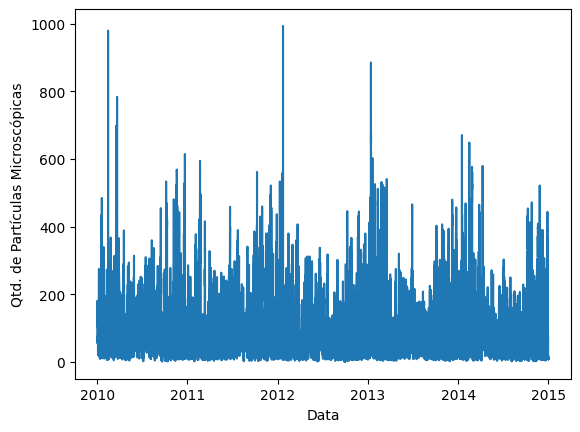

In [119]:
plt.plot(df["date"], df["pm2.5"])
plt.xlabel("Data")
plt.ylabel("Qtd. de Partículas Microscópicas")

# Decomposição Sazonal

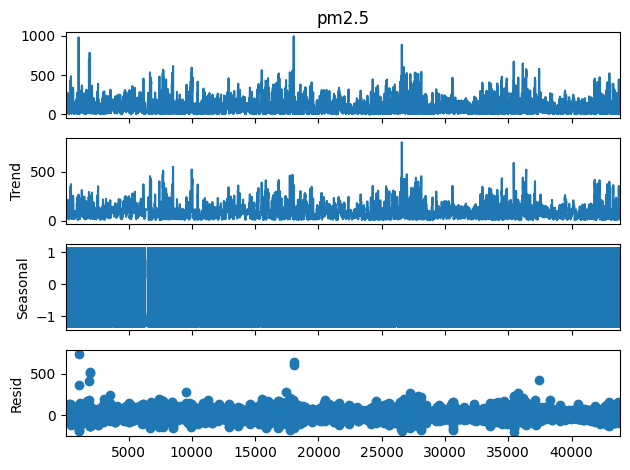

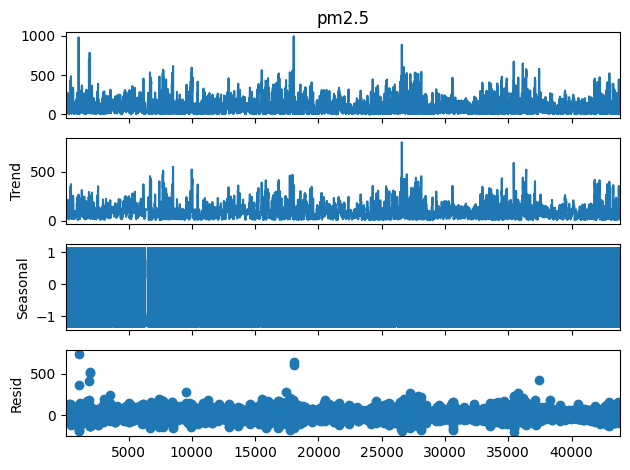

In [125]:
df_filtered = df[['date', 'pm2.5']]
result=seasonal_decompose(df_filtered['pm2.5'], model='additive', period=12)

result.plot()

<Axes: >

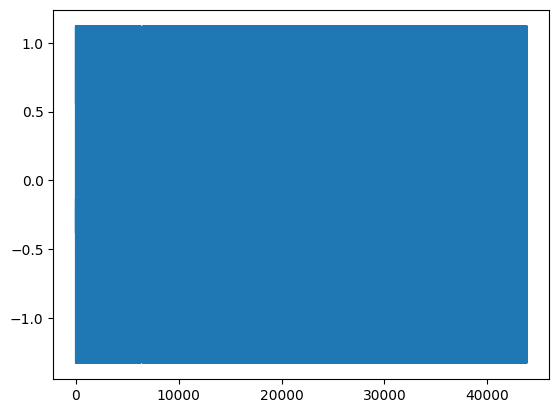

In [126]:
result.seasonal.plot()

# Autocorrelação

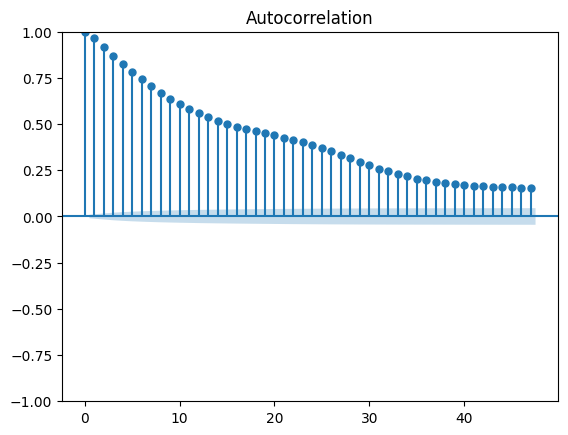

In [128]:
plot_acf(df_filtered["pm2.5"])
plt.show()